### Image Matching using SIFT

Using SIFT in order to track features in book and then place it above the other books

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [28]:
book = cv2.imread('book.jpg')
book = cv2.cvtColor(book,cv2.COLOR_BGR2RGB)

book_crop = cv2.imread('book_crop.jpg')
book_crop = cv2.cvtColor(book_crop,cv2.COLOR_BGR2RGB)

book_occ = cv2.imread('book_occlusion.jpg')
book_occ = cv2.cvtColor(book_occ,cv2.COLOR_BGR2RGB)

In [29]:
sift = cv2.xfeatures2d.SIFT_create()
kp_b1,dp_b1 = sift.detectAndCompute(book,None)
kp_bc,dp_bc = sift.detectAndCompute(book_crop,None)
kp_occ,dp_occ = sift.detectAndCompute(book_occ,None)

In [30]:
# Creation of matches and sorting them
bf = cv2.BFMatcher()
matches = bf.match(dp_b1,dp_occ)
matches = sorted(matches, key = lambda x:x.distance)

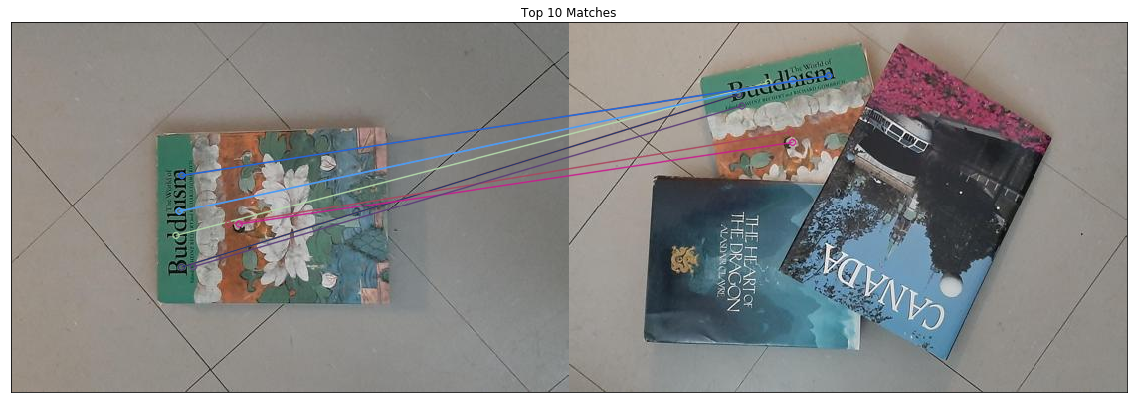

In [31]:
#display top 10 matches
imgmatch = cv2.drawMatches(book,kp_b1,book_occ,kp_occ, matches[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgmatch),plt.xticks([]),plt.yticks([]),plt.title('Top 10 Matches')
plt.show()

In [32]:
# Sort Points, Create and Use Homography
points1 = []
points2 = []
for count,mloc in enumerate(matches):
    if mloc.distance < 1000:
        points1.append(mloc.queryIdx)
        points2.append(mloc.trainIdx)
        
points1 = np.float32([kp_b1[i].pt for i in points1])
points2 = np.float32([kp_occ[i].pt for i in points2])

retval, mask = cv2.findHomography(points1,points2,cv2.RANSAC,4)
image_T = cv2.warpPerspective(book,retval,(book.shape[1],book.shape[0]))

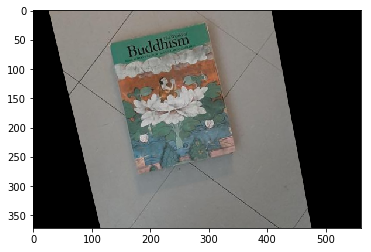

In [33]:
plt.imshow(image_T)
plt.show()

In [34]:
kp_T,dp_T = sift.detectAndCompute(image_T,None)
matches_T = bf.match(dp_T, dp_bc)
matches_T = sorted(matches_T, key = lambda x:x.distance)

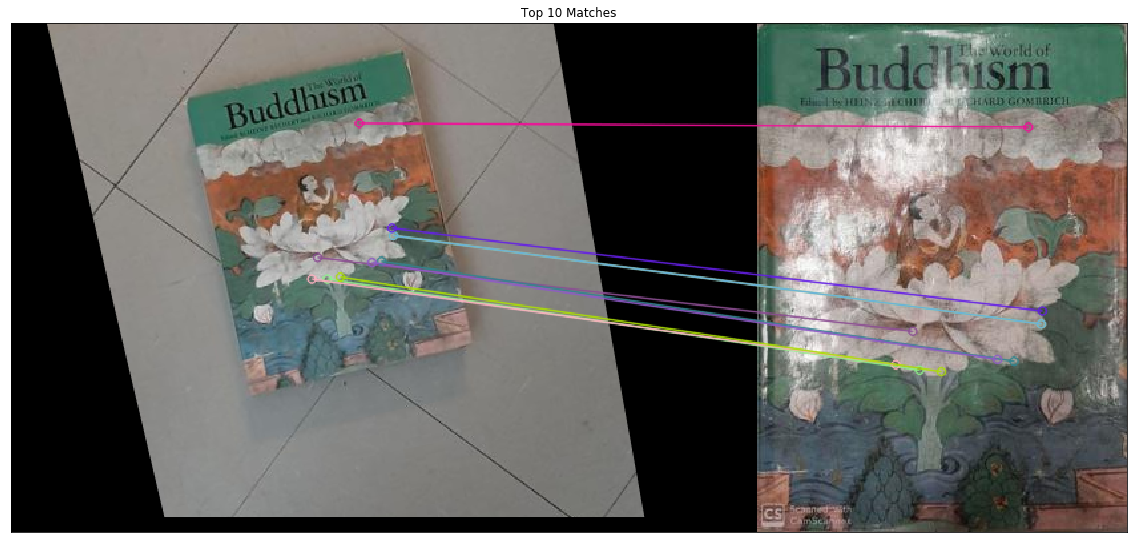

In [35]:
#display top 10 matches
imgmatch_T = cv2.drawMatches(image_T,kp_T,book_crop,kp_bc, matches_T[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgmatch_T),plt.xticks([]),plt.yticks([]),plt.title('Top 10 Matches')
plt.show()

In [36]:
points3 = []
points4 = []

for count,mloc in enumerate(matches_T):
    if mloc.distance < 1000:
        points3.append(mloc.queryIdx)
        points4.append(mloc.trainIdx)

points3 = np.float32([kp_T[i].pt for i in points3])
points4 = np.float32([kp_bc[i].pt for i in points4])

retval_T, mask_T = cv2.findHomography(points4,points3,cv2.RANSAC,4)
image_F = cv2.warpPerspective(book_crop,retval_T,(image_T.shape[1],image_T.shape[0]))

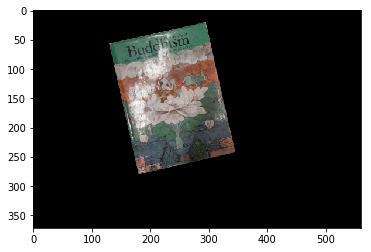

In [37]:
plt.imshow(image_F)
plt.show()

In [38]:
for i in range(book_occ.shape[0]):
    for j in range(book_occ.shape[1]):
        for k in range(book_occ.shape[2]):
            if image_F[i,j,k] != 0:
                book_occ[i,j,k] = image_F[i,j,k]

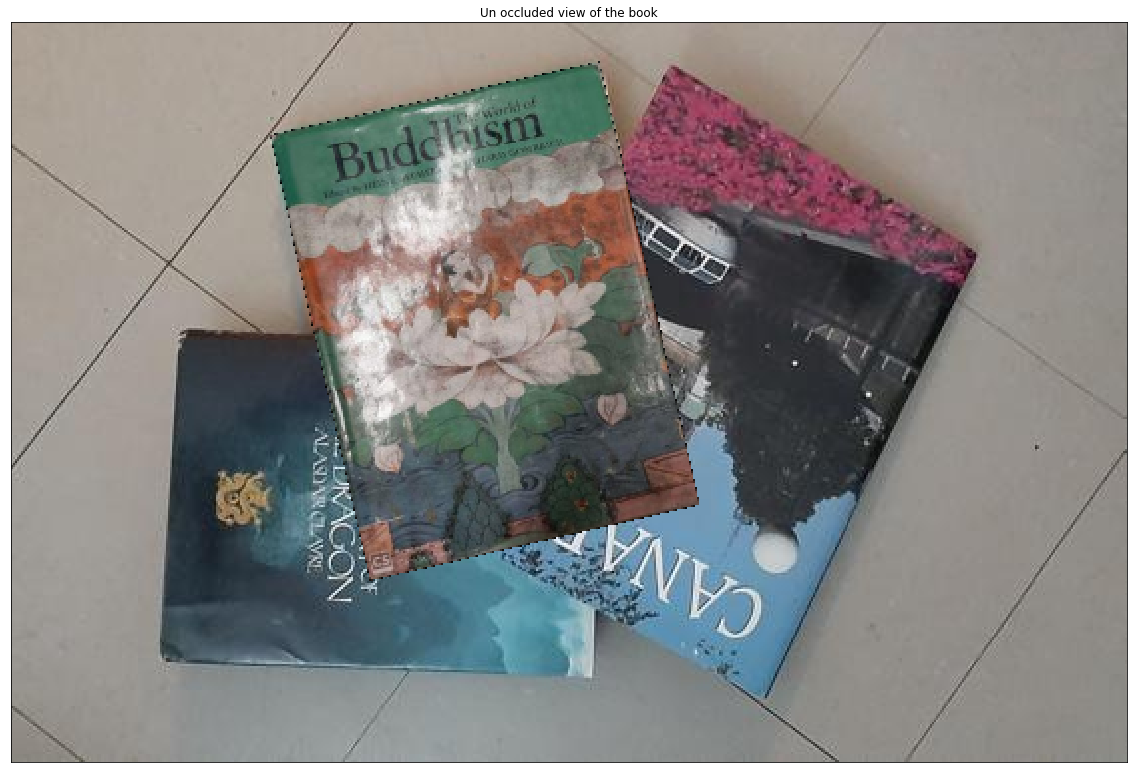

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(book_occ), plt.xticks([]),plt.yticks([]),plt.title('Un occluded view of the book')
plt.show()